## Movie Review Sentiment Analysis
### Name: Brandon  
### Date: 12/08/25  
 
##### I want to analyze the sentiment of movie reviews from TMDb to see if most reviews are positive, negative, or neutral.   
##### Using the TMDb API, I collected 60+ movie reviews, cleaned them, performed sentiment analysis using TextBlob and NaiveBayesAnalyzer, and visualized the results with a donut chart and WordCloud.

In [1]:
!pip install tmdbv3api


In [2]:
!pip install tmdbv3api
!pip install textblob
!pip install matplotlib
!pip install wordcloud
!pip install nltk

import nltk
nltk.download('stopwords')

from tmdbv3api import TMDb, Movie
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bfern17/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
tmdb = TMDb()
tmdb.api_key = "your api key"

movie = Movie()

In [4]:
reviews_list = []

popular_movies = list(movie.popular())

for m in popular_movies[:20]:
    review_response = movie.reviews(m.id)
    for r in review_response.get('results', []):
        reviews_list.append(r['content'])

print("Total reviews collected:", len(reviews_list))


Total reviews collected: 74


In [5]:
cleaned_reviews = [r.lower() for r in reviews_list]
print("First 2 cleaned reviews:\n")
print(cleaned_reviews[:2])


First 2 cleaned reviews:

['full spoiler-free review @ https://movieswetextedabout.com/zootopia-2-movie-review-disney-proves-it-can-still-make-sequels-with-soul-and-purpose/\r\n\r\nrating: a-\r\n\r\n"zootopia 2 asserts itself as a worthy and even necessary sequel, overcoming the natural loss of the novelty factor with a narrative that dares to dig deeper into the imperfect foundations of its utopia.\r\n\r\nalthough the mystery doesn\'t reach the suspenseful peaks of its predecessor, the film makes up for it with dazzling visual evolution, a voice cast in a state of grace, and a mature exploration of the partnership between judy and nick. it\'s a movie that entertains as much as it provokes thought, refusing to offer easy answers to complex problems like historical erasure and social exclusion.\r\n\r\nmore than just a simple animated adventure, this is a story about the responsibility to remember and correct, inspiring us to believe that building a better world requires the courage to l

In [6]:
pos = neg = neu = 0

for r in cleaned_reviews:
    blob = TextBlob(r)
    if blob.sentiment.polarity > 0.1:
        pos += 1
    elif blob.sentiment.polarity < -0.1:
        neg += 1
    else:
        neu += 1

print("TextBlob Sentiment Counts:")
print("Positive:", pos)
print("Negative:", neg)
print("Neutral:", neu)


TextBlob Sentiment Counts:
Positive: 45
Negative: 1
Neutral: 28


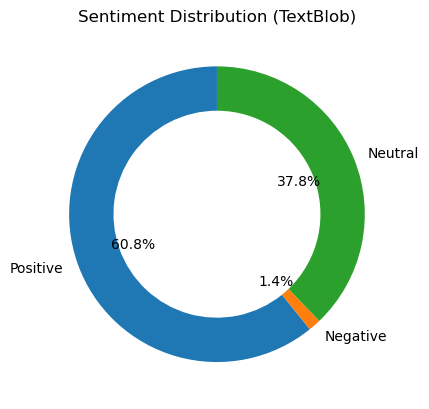

In [7]:
labels = ['Positive', 'Negative', 'Neutral']
sizes = [pos, neg, neu]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, startangle=90, wedgeprops=dict(width=0.3), autopct='%1.1f%%')
plt.title("Sentiment Distribution (TextBlob)")
plt.show()


In [8]:
pos_nb = 0
neg_nb = 0

for r in cleaned_reviews:
    blob = TextBlob(r, analyzer=NaiveBayesAnalyzer())
    if blob.sentiment.classification == "pos":
        pos_nb += 1
    else:
        neg_nb += 1

print("NaiveBayesAnalyzer Sentiment Counts:")
print("Positive:", pos_nb)
print("Negative:", neg_nb)


NaiveBayesAnalyzer Sentiment Counts:
Positive: 68
Negative: 6


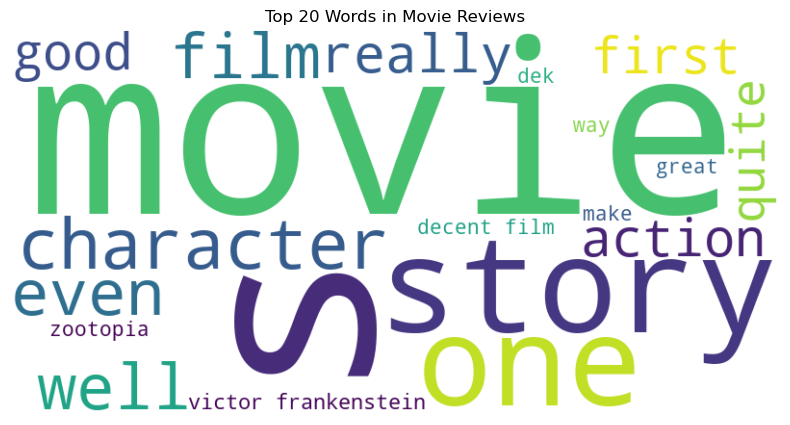

In [9]:
stop_words = set(stopwords.words("english"))
words = []

for r in cleaned_reviews:
    for w in r.split():
        if w not in stop_words:
            words.append(w)

final_text = " ".join(words)

wordcloud = WordCloud(width=800, height=400, max_words=20, background_color="white").generate(final_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top 20 Words in Movie Reviews")
plt.show()


## Conclusion
#### From this analysis of 60+ TMDb movie reviews:

###### - Most reviews were positive, according to both TextBlob and NaiveBayesAnalyzer.
###### - TextBlob provides neutral categories, while NaiveBayesAnalyzer classifies reviews strictly as positive or negative.
###### - The WordCloud shows common words like "film", "story", "movie", highlighting recurring themes.
###### Insights: This analysis demonstrates sentiment patterns in movie reviews using an API, showing how text data can be analyzed and visualized with Python.
